# Lab - Drzewa

## Zadania

1. Wczytaj zbiór `Carseats.csv`. Usuń kolumnę `Sales` i zastąp ją zmienną kategoryczną `SalesHigh`, która przyjmie wartość `Yes`, jeśli `Sales >= 8` i `No` w przeciwnym przypadku. Użyj drzew decyzyjnych do predykcji wartości `SalesHigh` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór treningowy i testowy.
    - Stwórz model [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.
2. Wczytaj zbiór `boston.csv`. Przewiduj wartość `medv` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór testowy i treningowy.
    - Stwórz model [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

carseats = pd.read_csv('Carseats.csv')
carseats.head()



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
carseats['SalesHigh'] = carseats['Sales'].map(lambda sale:  'Yes' if sale >= 8 else 'No')
cs = carseats.drop(['Sales'], axis='columns')
cs.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesHigh
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


 Podziel dane na zbiór treningowy i testowy

In [20]:
X = pd.get_dummies(cs.drop(columns="SalesHigh"))
y = cs.SalesHigh
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Stwórz model [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Użyj walidacji krzyżowej do ewaluacji modelu

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)
                            

array([0.7037037 , 0.7037037 , 0.74074074, 0.74074074, 0.85185185,
       0.77777778, 0.77777778, 0.55555556, 0.73076923, 0.80769231])

Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą.

In [22]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.00335821, 0.00354478, 0.00359315, 0.0036305 ,
        0.00447761, 0.00461976, 0.00497512, 0.00497512, 0.00549525,
        0.00559701, 0.00559701, 0.00621278, 0.00625   , 0.00639659,
        0.00643603, 0.00664926, 0.00686906, 0.00702371, 0.00844441,
        0.00852878, 0.00869431, 0.00971568, 0.01120497, 0.02267702,
        0.02835414, 0.03099802, 0.03370329, 0.03673434, 0.06840499]),
 array([0.        , 0.00671642, 0.01380597, 0.02099226, 0.02825325,
        0.03720848, 0.05106775, 0.05604288, 0.061018  , 0.06651325,
        0.07211027, 0.07770728, 0.08392006, 0.09642006, 0.10281665,
        0.10925268, 0.12920046, 0.14293858, 0.14996229, 0.1584067 ,
        0.16693548, 0.19301841, 0.22216544, 0.23337041, 0.25604743,
        0.31275571, 0.34375373, 0.37745702, 0.41419136, 0.48259635]))

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
 "max_depth":[5,10,20,],
 "min_samples_split":[20,40,60,80],
 "min_impurity_decrease": [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
gridSearch.best_score_, gridSearch.best_params_

(0.7091544374563241,
 {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20})

In [24]:
param_grid = {
 "max_depth": list(range(4, 14)),
 "min_samples_split": list(range(15, 25)),
 "min_impurity_decrease": [x/10000 for x in range(30, 70, 5)]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
gridSearch.best_score_, gridSearch.best_params_

(0.7314465408805031,
 {'max_depth': 6, 'min_impurity_decrease': 0.0045, 'min_samples_split': 17})

Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?

In [25]:
bestClassTree = gridSearch.best_estimator_
bestClassTree.get_depth(), bestClassTree.get_n_leaves(), bestClassTree.score(X_test, y_test)

(6, 18, 0.7651515151515151)

In [26]:
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)
clf1.get_depth(), clf1.get_n_leaves(), clf1.score(X_test, y_test)

(9, 46, 0.7954545454545454)

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [28]:
clf.score(X_test, y_test)

0.8257575757575758

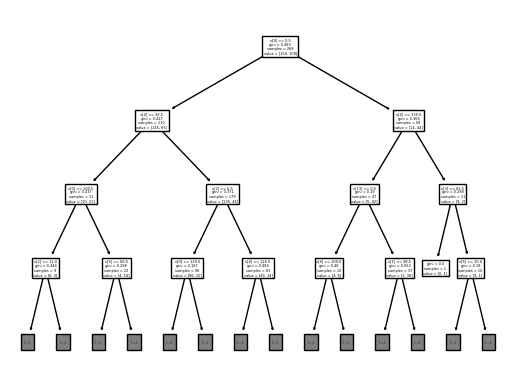

In [50]:
from sklearn import tree

tree.plot_tree(clf1, max_depth=3);

In [30]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
X = boston.drop(columns="medv")
y = boston.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [36]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
cross_val_score(regressor, X_train, y_train, cv=10)

array([0.76646086, 0.50920663, 0.86752501, 0.31638084, 0.67744625,
       0.80219183, 0.75676375, 0.83827964, 0.84923903, 0.86086342])

In [41]:
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, len(impurities)

(array([0.00000000e+00, 6.70718807e-16, 1.00607821e-15, 1.00607821e-15,
        1.34143761e-15, 1.47492625e-05, 1.47492625e-05, 1.47492625e-05,
        1.47492625e-05, 1.47492625e-05, 1.47492625e-05, 1.47492625e-05,
        1.47492625e-05, 1.47492625e-05, 1.47492625e-05, 1.47492625e-05,
        1.47492625e-05, 1.47492625e-05, 1.47492625e-05, 1.96656834e-05,
        1.96656834e-05, 2.94985251e-05, 3.93313668e-05, 4.42477876e-05,
        4.42477876e-05, 5.89970501e-05, 5.89970501e-05, 5.89970501e-05,
        5.89970501e-05, 5.89970501e-05, 5.89970501e-05, 5.89970501e-05,
        5.89970501e-05, 5.89970501e-05, 7.86627335e-05, 7.86627335e-05,
        7.86627335e-05, 7.86627335e-05, 1.22910521e-04, 1.32743363e-04,
        1.32743363e-04, 1.32743363e-04, 1.32743363e-04, 1.32743363e-04,
        1.32743363e-04, 1.32743363e-04, 1.32743363e-04, 1.32743363e-04,
        1.32743363e-04, 1.32743363e-04, 1.32743363e-04, 1.76991150e-04,
        1.84365782e-04, 2.35988201e-04, 2.35988201e-04, 2.359882

In [44]:
param_grid = {
 "max_depth":[5,10,20,],
 "max_leaf_nodes": [20, 30, 100,]
}

gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
gridSearch.best_score_, gridSearch.best_params_

(0.8039081288368299, {'max_depth': 10, 'max_leaf_nodes': 20})

In [45]:
param_grid = {
 "max_depth":list(range(6, 14)),
 "max_leaf_nodes": list(range(10, 25))
}

gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
gridSearch.best_score_, gridSearch.best_params_

(0.8081409913974639, {'max_depth': 8, 'max_leaf_nodes': 23})

In [46]:
bestClassTree = gridSearch.best_estimator_
bestClassTree.get_depth(), bestClassTree.get_n_leaves(), bestClassTree.score(X_test, y_test)

(8, 23, 0.8401796753499302)

In [47]:
reg1 = DecisionTreeRegressor(random_state=0)
reg1.fit(X_train, y_train)
reg1.get_depth(), reg1.get_n_leaves(), reg1.score(X_test, y_test)

(18, 318, 0.8217990757154089)

In [48]:
from sklearn.ensemble import RandomForestRegressor

reg2 = RandomForestRegressor(random_state=0)
reg2.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
reg2.score(X_test, y_test)

0.8881160015588958

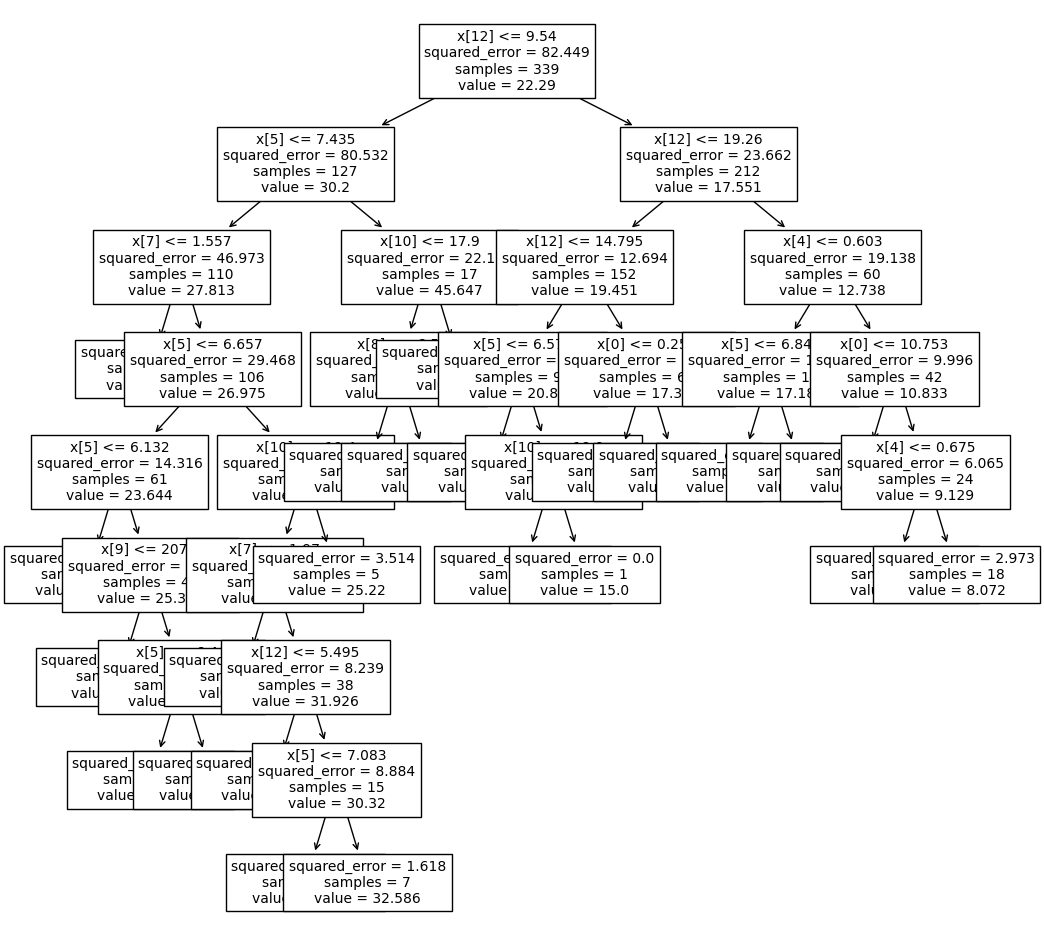

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
# x[12] corresponds to lstat
tree.plot_tree(bestClassTree, fontsize= 10);
plt.show()